# LIBRERIAS

In [ ]:
#instalaciones
!pip install yfinance
!pip install tensorflow
!pip install pandas_ta
!pip install hyperopt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 529 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 115 kB 3.6 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=af1a883caa667c33bf77ad5b0af4c9a32a38739d2246f074ee51a1f1686c1c95
  Stored in directory: /root/.cache/pip/wheels/54/4a/75/06b8e63fce6f6d2c1baae5c208edb18eca128407b0c96e1153
Successfully built pandas-ta
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#librerias metricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# busquda de parametros
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from hyperopt import hp, fmin, tpe, rand, STATUS_OK, Trials

In [ ]:
import pandas as pd
#import MetaTrader5 as mt5
import yfinance as yf
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn')
import tensorflow as t
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as pt
from sklearn.preprocessing import MinMaxScaler

import math
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.layers.core import Dense, Dropout, Activation
from tensorflow.keras.layers import LSTM
import numpy as np
import pandas as pd
import pandas_ta as ta
import sklearn.preprocessing as prep

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_PEN= pd.read_csv('/content/drive/MyDrive/datasets stmkt/pen_usd-08-19.csv',sep=';')

# PROCESAMIENTO DE DATOS

In [ ]:
df_PEN

,Date,Open,High,Low,Close,Adj Close
0,1/01/2008,2.964000,2.964000,2.964000,2.964000,2.964000
1,2/01/2008,2.981000,2.981000,2.978000,2.936300,2.936300
2,3/01/2008,2.937800,2.937800,2.930700,2.930700,2.930700
3,4/01/2008,2.931200,2.968000,2.931200,2.906500,2.906500
4,7/01/2008,2.929400,2.929400,2.929400,2.929200,2.929200
...,...,...,...,...,...,...
3125,24/12/2019,3.240419,3.317500,3.240419,3.317500,3.317500
3126,25/12/2019,3.243933,3.243933,3.243933,3.313000,3.313000
3127,26/12/2019,3.242661,3.318000,3.242661,3.243933,3.243933
3128,27/12/2019,3.239345,3.325000,3.239345,3.319000,3.319000


In [ ]:
df_PEN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3130 entries, 0 to 3129
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3130 non-null   object 
 1   Open       3128 non-null   float64
 2   High       3128 non-null   float64
 3   Low        3128 non-null   float64
 4   Close      3128 non-null   float64
 5   Adj Close  3128 non-null   float64
dtypes: float64(5), object(1)
memory usage: 146.8+ KB


In [ ]:
df_PEN_=df_PEN.set_index('Date')


In [ ]:
df_PEN_=df_PEN.dropna()

In [ ]:
df_PEN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3130 entries, 0 to 3129
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3130 non-null   object 
 1   Open       3128 non-null   float64
 2   High       3128 non-null   float64
 3   Low        3128 non-null   float64
 4   Close      3128 non-null   float64
 5   Adj Close  3128 non-null   float64
dtypes: float64(5), object(1)
memory usage: 146.8+ KB


In [ ]:
data=df_PEN_['Close']
print(data)

0       2.964000
1       2.936300
2       2.930700
3       2.906500
4       2.929200
          ...   
3125    3.317500
3126    3.313000
3127    3.243933
3128    3.319000
3129    3.314000
Name: Close, Length: 3128, dtype: float64


In [ ]:

dataset_pen=data.values
print(dataset_pen)
training_dataset_len=len(dataset_pen)* .8
print(training_dataset_len)

[2.964    2.9363   2.9307   ... 3.243933 3.319    3.314   ]
2502.4


In [ ]:
print(type(dataset_pen))
dt_pen=np.array(dataset_pen)
dt_pen = dt_pen[np.logical_not(np.isnan(dt_pen))] # Line 1
print(dt_pen)
#array.reshape(-1, 1)
dt_pen=dt_pen.reshape(-1,1)
print(dt_pen)

<class 'numpy.ndarray'>
[2.964    2.9363   2.9307   ... 3.243933 3.319    3.314   ]
[[2.964   ]
 [2.9363  ]
 [2.9307  ]
 ...
 [3.243933]
 [3.319   ]
 [3.314   ]]


In [ ]:
len(dt_pen)

3128

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dt_pen)
scaled_data

array([[0.74756482],
       [0.73806421],
       [0.7361435 ],
       ...,
       [0.84357697],
       [0.86932364],
       [0.86760873]])

In [ ]:
train_data=scaled_data[0:int(training_dataset_len), :]
print(len(train_data))

x_train=[]
y_train=[]
window=10
for i in range(window,len(train_data)):
  x_train.append(train_data[i-window:i,0])
  y_train.append(train_data[i,0])
  if i<=window:
    print(x_train)
    print(y_train)
    print()

#funcion de autocorrelacion parcial ()

2502
[array([0.74756482, 0.73806421, 0.7361435 , 0.72784333, 0.73562903,
       0.73158184, 0.74636438, 0.71871999, 0.72708876, 0.71731376])]
[0.7170736726574289]



In [ ]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
x_train.shape

(2492, 10)

In [ ]:
#reshapeee data for lstm
n_features=1
x_train=np.reshape(x_train, (x_train.shape[0],x_train.shape[1],n_features) )
x_train.shape

(2492, 10, 1)

# MODELO LSTM CONFIGURACION

In [ ]:
model_lstm=Sequential()
model_lstm.add(LSTM(units=60,activation = 'relu', return_sequences=True, input_shape=(x_train.shape[1],1)))
model_lstm.add(Dropout(0.25))
model_lstm.add(LSTM(units=50))
model_lstm.add(Dense(25))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(units=1,activation='linear'))

In [ ]:
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 10, 60)            14880     
                                                                 
 dropout_2 (Dropout)         (None, 10, 60)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                22200     
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dropout_3 (Dropout)         (None, 25)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 38,381
Trainable params: 38,381
Non-trai

In [ ]:
optimizer = tf.keras.optimizers.Adam(clipvalue=1e-50)

In [ ]:
model_lstm.compile(optimizer='Adam', loss='mean_squared_error',metrics=['mse', 'mae', 'mape'])

In [ ]:
history=model_lstm.fit(
    x_train,y_train,batch_size=64,epochs=150)

Epoch 1/150
39/39 [==============================] - 4s 19ms/step - loss: 0.1202 - mse: 0.1202 - mae: 0.2714 - mape: 307430.7500
Epoch 2/150
39/39 [==============================] - 1s 18ms/step - loss: 0.0282 - mse: 0.0282 - mae: 0.1342 - mape: 238974.4531
Epoch 3/150
39/39 [==============================] - 1s 18ms/step - loss: 0.0227 - mse: 0.0227 - mae: 0.1197 - mape: 263685.9688
Epoch 4/150
39/39 [==============================] - 1s 18ms/step - loss: 0.0222 - mse: 0.0222 - mae: 0.1187 - mape: 327082.9062
Epoch 5/150
39/39 [==============================] - 1s 18ms/step - loss: 0.0200 - mse: 0.0200 - mae: 0.1119 - mape: 290337.8125
Epoch 6/150
39/39 [==============================] - 1s 18ms/step - loss: 0.0201 - mse: 0.0201 - mae: 0.1120 - mape: 280394.6250
Epoch 7/150
39/39 [==============================] - 1s 19ms/step - loss: 0.0192 - mse: 0.0192 - mae: 0.1097 - mape: 323325.9062
Epoch 8/150
39/39 [==============================] - 1s 18ms/step - loss: 0.0190 - mse: 0.0190 - 

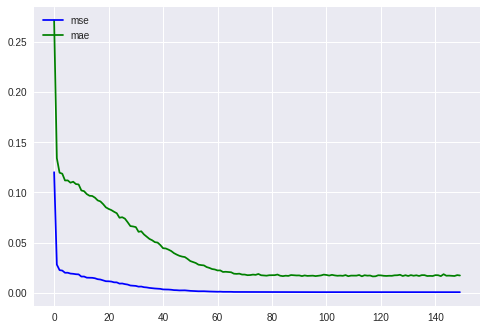

In [ ]:
plt.plot(history.history['mse'],'-b',label='mse')
plt.plot(history.history['mae'],'-g',label='mae')
plt.legend(loc='upper left')
plt.show()

In [ ]:
test_data=scaled_data[int(training_dataset_len)-10:, :]
print(len(test_data))

x_test=[]
y_test=dt_pen[int(training_dataset_len):,:]
window=10
for i in range(window,len(test_data)):
  x_test.append(test_data[i-window:i,0])
x_test=np.array(x_test)


636


In [ ]:
print(len(x_test))
print(len(y_test))

626
626


In [ ]:
x_test=np.reshape(x_test, (x_test.shape[0],x_test.shape[1],n_features) )


In [ ]:
predictions=model_lstm.predict(x_test)

20/20 [==============================] - 1s 5ms/step


In [ ]:

preds=scaler.inverse_transform(predictions.reshape(-1,1))

In [ ]:
print(len(preds))

626


In [ ]:
#metricas
# RMSE
print("Resultados de metricas")
print('Test RSME',np.sqrt(metrics.mean_squared_error(y_test, preds)))
k = metrics.mean_absolute_error(y_test, preds)
print('Test Mean Absolute Error', k )
print('Test r2', metrics.r2_score(y_test,preds) )

Resultados de metricas
Test RSME 0.051171786307368745
Test Mean Absolute Error 0.04285109382207706
Test r2 0.4487240530567813


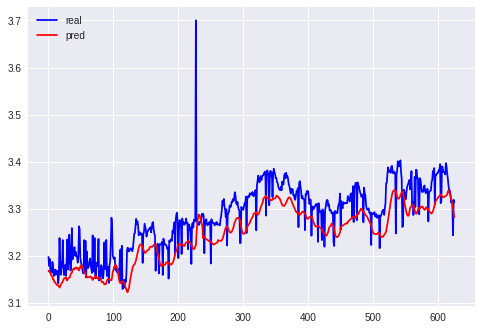

In [ ]:
plt.plot(y_test, '-b',label='real')
plt.plot(preds, '-r',label='pred')
plt.legend(loc='upper left')
plt.show()

#eliminar anomalia (reemplazar con data promedio)
#imputacion de datos


#siguiente resultados presentacion, comparacion de resultados()
#para el final de hiperparametros


# LSTM CON OPTUNA

In [ ]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 348 kB 5.7 MB/s 
     |████████████████████████████████| 81 kB 7.4 MB/s 
     |████████████████████████████████| 209 kB 55.5 MB/s 
     |████████████████████████████████| 78 kB 6.9 MB/s 
     |████████████████████████████████| 112 kB 53.7 MB/s 
     |████████████████████████████████| 147 kB 52.2 MB/s 
     |████████████████████████████████| 50 kB 5.6 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=95a0268e527e61365e037982867203ad1ec80e2d8932bf7c5d7e8d14a2f185f8
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
import keras
def create_lstm_model(trial):

    x0 = tf.keras.layers.Input(shape=(x_train.shape[1],1))
    lstm_layers = 4
    lstm_units = np.zeros(lstm_layers, dtype=np.int)
    lstm_units[0] = trial.suggest_int("lstm_units_L1", 100, 1536)
    lstm = Sequential(LSTM(lstm_units[0], return_sequences=True))(x0)
    for i in range(lstm_layers-1):
        lstm_units[i+1] = trial.suggest_int("lstm_units_L{}".format(i+2), lstm_units[i]//2, lstm_units[i])
        lstm = LSTM(lstm_units[i+1], return_sequences=True)(lstm)
    dropout_rate = trial.suggest_float("lstm_dropout", 0.0, 0.5)
    lstm = Dropout(dropout_rate)(lstm)
    dense_units = lstm_units[-1]
    # try different activations
    activation = trial.suggest_categorical("activation", ["relu", "selu", "elu", "swish"])
    lstm = Dense(dense_units, activation=activation)(lstm)
    lstm = Dense(1)(lstm)

    model = keras.Model(inputs=x0, outputs=lstm)
    model.compile(optimizer="adam", loss='mean_squared_error',metrics=['mse', 'mae', 'mape','accuracy'])

    return model

In [ ]:
# Function to get hardware strategy
def get_hardware_strategy():
    try:
        # TPU detection. No parameters necessary if TPU_NAME environment variable is
        # set: this is always the case on Kaggle.
        tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
        print('Running on TPU ', tpu.master())
    except ValueError:
        tpu = None

    if tpu:
        tf.config.experimental_connect_to_cluster(tpu)
        tf.tpu.experimental.initialize_tpu_system(tpu)
        strategy = tf.distribute.experimental.TPUStrategy(tpu)
        tf.config.optimizer.set_jit(True)
    else:
        # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
        strategy = tf.distribute.get_strategy()

    return tpu, strategy

tpu, strategy = get_hardware_strategy()

In [ ]:
EPOCHS = 10 # number of epocs per trial
BATCH_SIZE=32
import optuna
from optuna.integration import TFKerasPruningCallback
from optuna.trial import TrialState
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras import *
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers.schedules import ExponentialDecay

In [ ]:

def objective(trial):

    # Clear clutter from previous session graphs.
    keras.backend.clear_session()

    with strategy.scope():
        # Generate our trial model.
        model = create_lstm_model(trial)

        # learning rate scheduler
        scheduler = ExponentialDecay(1e-3, 400*((x_train.shape[0]*0.8)/BATCH_SIZE), 1e-5)
        lr = LearningRateScheduler(scheduler, verbose=0)

        # Fit the model on the training data.
        # The TFKerasPruningCallback checks for pruning condition every epoch.
        model.fit(
            x_train,
            y_train,
            batch_size=BATCH_SIZE,
            epochs=EPOCHS,
            verbose=1,
        )

        # Evaluate the model accuracy on the validation set.
        score = model.evaluate(x_test, y_test, verbose=0)
        return score[0]

In [ ]:
study = optuna.create_study(direction="minimize", sampler=optuna.samplers.TPESampler(), pruner=optuna.pruners.HyperbandPruner())
study.optimize(objective, n_trials=100)
pruned_trials = study.get_trials(deepcopy=False, states=[TrialState.PRUNED])
complete_trials = study.get_trials(deepcopy=False, states=[TrialState.COMPLETE])

[I 2022-11-22 07:22:23,921] A new study created in memory with name: no-name-2e1f286a-1e6e-4757-95ad-d9280e40cbc9
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Epoch 1/10
78/78 [==============================] - 120s 1s/step - loss: 0.0373 - mse: 0.0373 - mae: 0.1247 - mape: 197028.8750 - accuracy: 2.2053e-04
Epoch 2/10
78/78 [==============================] - 108s 1s/step - loss: 0.0077 - mse: 0.0077 - mae: 0.0730 - mape: 290762.5938 - accuracy: 0.0000e+00
Epoch 3/10
78/78 [==============================] - 112s 1s/step - loss: 0.0082 - mse: 0.0082 - mae: 0.0748 - mape: 293806.8125 - accuracy: 0.0000e+00
Epoch 4/10
78/78 [==============================] - 108s 1s/step - loss: 0.0077 - mse: 0.0077 - mae: 0.0726 - mape: 282031.3125 - accuracy: 0.0000e+00
Epoch 5/10
78/78 [==============================] - 112s 1s/step - loss: 0.0078 - mse: 0.0078 - mae: 0.0731 - mape: 296164.9375 - accuracy: 0.0000e+00
Epoch 6/10
78/78 [==============================] - 113s 1s/step - loss: 0.0080 - mse: 0.0080 - mae: 0.0742 - mape: 291291.1250 - accuracy: 0.0000e+00
Epoch 7/10
78/78 [==============================] - 110s 1s/step - loss: 0.0082 - mse: 0.0082 

[I 2022-11-22 07:42:09,652] Trial 0 finished with value: 6.456847190856934 and parameters: {'lstm_units_L1': 1142, 'lstm_units_L2': 689, 'lstm_units_L3': 505, 'lstm_units_L4': 499, 'lstm_dropout': 0.21486332788647505, 'activation': 'swish'}. Best is trial 0 with value: 6.456847190856934.


Epoch 1/10
78/78 [==============================] - 224s 3s/step - loss: 0.0900 - mse: 0.0900 - mae: 0.1940 - mape: 280753.9688 - accuracy: 1.2029e-04
Epoch 2/10
78/78 [==============================] - 211s 3s/step - loss: 0.0078 - mse: 0.0078 - mae: 0.0732 - mape: 298685.4375 - accuracy: 0.0000e+00
Epoch 3/10
78/78 [==============================] - 210s 3s/step - loss: 0.0076 - mse: 0.0076 - mae: 0.0725 - mape: 291368.0000 - accuracy: 0.0000e+00
Epoch 4/10
78/78 [==============================] - 203s 3s/step - loss: 0.0077 - mse: 0.0077 - mae: 0.0726 - mape: 287107.9062 - accuracy: 0.0000e+00
Epoch 5/10
78/78 [==============================] - 199s 3s/step - loss: 0.0076 - mse: 0.0076 - mae: 0.0727 - mape: 295181.7188 - accuracy: 0.0000e+00
Epoch 6/10
78/78 [==============================] - 207s 3s/step - loss: 0.0077 - mse: 0.0077 - mae: 0.0733 - mape: 290673.1562 - accuracy: 0.0000e+00
Epoch 7/10
78/78 [==============================] - 206s 3s/step - loss: 0.0077 - mse: 0.0077 

[I 2022-11-22 08:18:03,967] Trial 1 finished with value: 6.428468704223633 and parameters: {'lstm_units_L1': 1444, 'lstm_units_L2': 1351, 'lstm_units_L3': 799, 'lstm_units_L4': 587, 'lstm_dropout': 0.08539516793237367, 'activation': 'swish'}. Best is trial 1 with value: 6.428468704223633.


Epoch 1/10
78/78 [==============================] - 12s 34ms/step - loss: 0.0990 - mse: 0.0990 - mae: 0.2404 - mape: 195652.3438 - accuracy: 2.3055e-04
Epoch 2/10
78/78 [==============================] - 2s 32ms/step - loss: 0.0141 - mse: 0.0141 - mae: 0.0947 - mape: 283636.5625 - accuracy: 0.0000e+00
Epoch 3/10
78/78 [==============================] - 3s 33ms/step - loss: 0.0099 - mse: 0.0099 - mae: 0.0807 - mape: 280175.6250 - accuracy: 0.0000e+00
Epoch 4/10
78/78 [==============================] - 3s 34ms/step - loss: 0.0087 - mse: 0.0087 - mae: 0.0760 - mape: 294293.6875 - accuracy: 0.0000e+00
Epoch 5/10
78/78 [==============================] - 3s 34ms/step - loss: 0.0082 - mse: 0.0082 - mae: 0.0744 - mape: 289762.8750 - accuracy: 0.0000e+00
Epoch 6/10
78/78 [==============================] - 3s 35ms/step - loss: 0.0080 - mse: 0.0080 - mae: 0.0740 - mape: 288583.6875 - accuracy: 0.0000e+00
Epoch 7/10
78/78 [==============================] - 3s 35ms/step - loss: 0.0079 - mse: 0.0079

[I 2022-11-22 08:18:44,852] Trial 2 finished with value: 6.491489410400391 and parameters: {'lstm_units_L1': 111, 'lstm_units_L2': 85, 'lstm_units_L3': 45, 'lstm_units_L4': 22, 'lstm_dropout': 0.336855648952489, 'activation': 'elu'}. Best is trial 1 with value: 6.428468704223633.


Epoch 1/10
78/78 [==============================] - 135s 2s/step - loss: 0.0523 - mse: 0.0523 - mae: 0.1513 - mape: 298013.4062 - accuracy: 0.0000e+00
Epoch 2/10
78/78 [==============================] - 127s 2s/step - loss: 0.0078 - mse: 0.0078 - mae: 0.0731 - mape: 282446.4688 - accuracy: 0.0000e+00
Epoch 3/10
78/78 [==============================] - 127s 2s/step - loss: 0.0077 - mse: 0.0077 - mae: 0.0729 - mape: 288289.5312 - accuracy: 0.0000e+00
Epoch 4/10
78/78 [==============================] - 126s 2s/step - loss: 0.0076 - mse: 0.0076 - mae: 0.0728 - mape: 293251.1562 - accuracy: 0.0000e+00
Epoch 5/10
78/78 [==============================] - 124s 2s/step - loss: 0.0076 - mse: 0.0076 - mae: 0.0728 - mape: 289868.3750 - accuracy: 0.0000e+00
Epoch 6/10
78/78 [==============================] - 123s 2s/step - loss: 0.0077 - mse: 0.0077 - mae: 0.0728 - mape: 302401.6562 - accuracy: 0.0000e+00
Epoch 7/10
78/78 [==============================] - 125s 2s/step - loss: 0.0076 - mse: 0.0076 

[I 2022-11-22 08:40:27,898] Trial 3 finished with value: 6.543444633483887 and parameters: {'lstm_units_L1': 963, 'lstm_units_L2': 947, 'lstm_units_L3': 647, 'lstm_units_L4': 404, 'lstm_dropout': 0.11455332899333065, 'activation': 'relu'}. Best is trial 1 with value: 6.428468704223633.


Epoch 1/10
78/78 [==============================] - 313s 4s/step - loss: 0.1926 - mse: 0.1926 - mae: 0.2010 - mape: 282362.5312 - accuracy: 0.0000e+00
Epoch 2/10
78/78 [==============================] - 303s 4s/step - loss: 0.0078 - mse: 0.0078 - mae: 0.0733 - mape: 281163.3750 - accuracy: 0.0000e+00
Epoch 3/10
78/78 [==============================] - 315s 4s/step - loss: 0.0079 - mse: 0.0079 - mae: 0.0737 - mape: 292013.1250 - accuracy: 0.0000e+00
Epoch 4/10
78/78 [==============================] - 297s 4s/step - loss: 0.0079 - mse: 0.0079 - mae: 0.0737 - mape: 285718.0625 - accuracy: 0.0000e+00
Epoch 5/10
78/78 [==============================] - 289s 4s/step - loss: 0.0077 - mse: 0.0077 - mae: 0.0732 - mape: 292480.9375 - accuracy: 0.0000e+00
Epoch 6/10
78/78 [==============================] - 289s 4s/step - loss: 0.0078 - mse: 0.0078 - mae: 0.0729 - mape: 288806.0938 - accuracy: 0.0000e+00
Epoch 7/10
78/78 [==============================] - 291s 4s/step - loss: 0.0078 - mse: 0.0078 

[I 2022-11-22 09:30:18,414] Trial 4 finished with value: 6.602338790893555 and parameters: {'lstm_units_L1': 1477, 'lstm_units_L2': 1403, 'lstm_units_L3': 1176, 'lstm_units_L4': 1055, 'lstm_dropout': 0.1379135922705655, 'activation': 'relu'}. Best is trial 1 with value: 6.428468704223633.


Epoch 1/10
78/78 [==============================] - 22s 157ms/step - loss: 0.0584 - mse: 0.0584 - mae: 0.1659 - mape: 164010.2500 - accuracy: 2.5185e-04
Epoch 2/10
78/78 [==============================] - 12s 154ms/step - loss: 0.0087 - mse: 0.0087 - mae: 0.0767 - mape: 288220.0625 - accuracy: 0.0000e+00
Epoch 3/10
78/78 [==============================] - 12s 156ms/step - loss: 0.0080 - mse: 0.0080 - mae: 0.0738 - mape: 302863.4062 - accuracy: 0.0000e+00
Epoch 4/10
78/78 [==============================] - 13s 163ms/step - loss: 0.0078 - mse: 0.0078 - mae: 0.0734 - mape: 290760.8438 - accuracy: 0.0000e+00
Epoch 5/10
78/78 [==============================] - 14s 172ms/step - loss: 0.0076 - mse: 0.0076 - mae: 0.0729 - mape: 289063.8125 - accuracy: 0.0000e+00
Epoch 6/10
78/78 [==============================] - 12s 160ms/step - loss: 0.0076 - mse: 0.0076 - mae: 0.0728 - mape: 291241.9375 - accuracy: 0.0000e+00
Epoch 7/10
78/78 [==============================] - 14s 185ms/step - loss: 0.0076 

[I 2022-11-22 09:32:55,261] Trial 5 finished with value: 6.549992561340332 and parameters: {'lstm_units_L1': 287, 'lstm_units_L2': 266, 'lstm_units_L3': 170, 'lstm_units_L4': 85, 'lstm_dropout': 0.12413564614171424, 'activation': 'elu'}. Best is trial 1 with value: 6.428468704223633.


Epoch 1/10
78/78 [==============================] - 58s 616ms/step - loss: 0.0593 - mse: 0.0593 - mae: 0.1619 - mape: 278382.5625 - accuracy: 0.0000e+00
Epoch 2/10
78/78 [==============================] - 49s 632ms/step - loss: 0.0078 - mse: 0.0078 - mae: 0.0735 - mape: 287460.5312 - accuracy: 0.0000e+00
Epoch 3/10
78/78 [==============================] - 47s 607ms/step - loss: 0.0076 - mse: 0.0076 - mae: 0.0727 - mape: 295085.4062 - accuracy: 0.0000e+00
Epoch 4/10
78/78 [==============================] - 48s 615ms/step - loss: 0.0076 - mse: 0.0076 - mae: 0.0728 - mape: 295229.3125 - accuracy: 0.0000e+00
Epoch 5/10
78/78 [==============================] - 46s 588ms/step - loss: 0.0076 - mse: 0.0076 - mae: 0.0729 - mape: 290938.9062 - accuracy: 0.0000e+00
Epoch 6/10
78/78 [==============================] - 45s 575ms/step - loss: 0.0076 - mse: 0.0076 - mae: 0.0727 - mape: 287139.9062 - accuracy: 0.0000e+00
Epoch 7/10
78/78 [==============================] - 45s 572ms/step - loss: 0.0076 

[I 2022-11-22 09:41:34,862] Trial 6 finished with value: 6.439904689788818 and parameters: {'lstm_units_L1': 720, 'lstm_units_L2': 468, 'lstm_units_L3': 309, 'lstm_units_L4': 247, 'lstm_dropout': 0.12363873508570894, 'activation': 'elu'}. Best is trial 1 with value: 6.428468704223633.


Epoch 1/10
78/78 [==============================] - 49s 500ms/step - loss: 0.0609 - mse: 0.0609 - mae: 0.1649 - mape: 103437.4141 - accuracy: 4.0096e-04
Epoch 2/10
78/78 [==============================] - 42s 537ms/step - loss: 0.0080 - mse: 0.0080 - mae: 0.0741 - mape: 290168.9688 - accuracy: 0.0000e+00
Epoch 3/10
78/78 [==============================] - 41s 521ms/step - loss: 0.0077 - mse: 0.0077 - mae: 0.0730 - mape: 289760.4062 - accuracy: 0.0000e+00
Epoch 4/10
78/78 [==============================] - 41s 521ms/step - loss: 0.0076 - mse: 0.0076 - mae: 0.0726 - mape: 292545.4375 - accuracy: 0.0000e+00
Epoch 5/10
78/78 [==============================] - 42s 535ms/step - loss: 0.0076 - mse: 0.0076 - mae: 0.0728 - mape: 290992.9062 - accuracy: 0.0000e+00
Epoch 6/10
78/78 [==============================] - 41s 529ms/step - loss: 0.0076 - mse: 0.0076 - mae: 0.0725 - mape: 290630.2812 - accuracy: 0.0000e+00
Epoch 7/10
78/78 [==============================] - 41s 525ms/step - loss: 0.0076 

[I 2022-11-22 09:48:48,125] Trial 7 finished with value: 6.607048034667969 and parameters: {'lstm_units_L1': 683, 'lstm_units_L2': 440, 'lstm_units_L3': 300, 'lstm_units_L4': 217, 'lstm_dropout': 0.38415449459192746, 'activation': 'elu'}. Best is trial 1 with value: 6.428468704223633.


Epoch 1/10
78/78 [==============================] - 15s 80ms/step - loss: 0.0617 - mse: 0.0617 - mae: 0.1731 - mape: 294928.4688 - accuracy: 1.0024e-05
Epoch 2/10
78/78 [==============================] - 6s 81ms/step - loss: 0.0088 - mse: 0.0088 - mae: 0.0772 - mape: 293255.1562 - accuracy: 0.0000e+00
Epoch 3/10
78/78 [==============================] - 6s 79ms/step - loss: 0.0080 - mse: 0.0080 - mae: 0.0742 - mape: 290891.5000 - accuracy: 0.0000e+00
Epoch 4/10
78/78 [==============================] - 6s 83ms/step - loss: 0.0079 - mse: 0.0079 - mae: 0.0738 - mape: 290289.2188 - accuracy: 0.0000e+00
Epoch 5/10
78/78 [==============================] - 6s 81ms/step - loss: 0.0077 - mse: 0.0077 - mae: 0.0729 - mape: 287842.9688 - accuracy: 0.0000e+00
Epoch 6/10
78/78 [==============================] - 6s 80ms/step - loss: 0.0076 - mse: 0.0076 - mae: 0.0728 - mape: 286313.7188 - accuracy: 0.0000e+00
Epoch 7/10
78/78 [==============================] - 6s 78ms/step - loss: 0.0077 - mse: 0.0077

[I 2022-11-22 09:50:22,020] Trial 8 finished with value: 6.525350093841553 and parameters: {'lstm_units_L1': 221, 'lstm_units_L2': 113, 'lstm_units_L3': 76, 'lstm_units_L4': 65, 'lstm_dropout': 0.22692659402783955, 'activation': 'selu'}. Best is trial 1 with value: 6.428468704223633.


Epoch 1/10
78/78 [==============================] - 82s 944ms/step - loss: 0.0404 - mse: 0.0404 - mae: 0.1313 - mape: 287355.7500 - accuracy: 0.0000e+00
Epoch 2/10
78/78 [==============================] - 78s 987ms/step - loss: 0.0078 - mse: 0.0078 - mae: 0.0731 - mape: 288621.5000 - accuracy: 0.0000e+00
Epoch 3/10
78/78 [==============================] - 73s 940ms/step - loss: 0.0077 - mse: 0.0077 - mae: 0.0730 - mape: 293155.7188 - accuracy: 0.0000e+00
Epoch 4/10
78/78 [==============================] - 72s 918ms/step - loss: 0.0077 - mse: 0.0077 - mae: 0.0731 - mape: 288327.2500 - accuracy: 0.0000e+00
Epoch 5/10
78/78 [==============================] - 74s 946ms/step - loss: 0.0076 - mse: 0.0076 - mae: 0.0728 - mape: 296716.1562 - accuracy: 0.0000e+00
Epoch 6/10
78/78 [==============================] - 72s 929ms/step - loss: 0.0076 - mse: 0.0076 - mae: 0.0727 - mape: 288177.2812 - accuracy: 0.0000e+00
Epoch 7/10
78/78 [==============================] - 71s 906ms/step - loss: 0.0076 

[I 2022-11-22 10:03:01,733] Trial 9 finished with value: 6.55948543548584 and parameters: {'lstm_units_L1': 894, 'lstm_units_L2': 555, 'lstm_units_L3': 477, 'lstm_units_L4': 333, 'lstm_dropout': 0.4317550216369257, 'activation': 'elu'}. Best is trial 1 with value: 6.428468704223633.


Epoch 1/10
78/78 [==============================] - 250s 3s/step - loss: 0.0985 - mse: 0.0985 - mae: 0.1960 - mape: 45.6420 - accuracy: 4.0096e-04
Epoch 2/10
78/78 [==============================] - 237s 3s/step - loss: 0.0076 - mse: 0.0076 - mae: 0.0728 - mape: 289587.4375 - accuracy: 0.0000e+00
Epoch 3/10
78/78 [==============================] - 236s 3s/step - loss: 0.0077 - mse: 0.0077 - mae: 0.0731 - mape: 285493.8750 - accuracy: 0.0000e+00
Epoch 4/10
78/78 [==============================] - 235s 3s/step - loss: 0.0077 - mse: 0.0077 - mae: 0.0733 - mape: 288644.8750 - accuracy: 0.0000e+00
Epoch 5/10
78/78 [==============================] - 239s 3s/step - loss: 0.0076 - mse: 0.0076 - mae: 0.0726 - mape: 290245.6250 - accuracy: 0.0000e+00
Epoch 6/10
78/78 [==============================] - 244s 3s/step - loss: 0.0079 - mse: 0.0079 - mae: 0.0737 - mape: 298863.0312 - accuracy: 0.0000e+00
Epoch 7/10
78/78 [==============================] - 240s 3s/step - loss: 0.0076 - mse: 0.0076 - ma

[I 2022-11-22 10:43:27,598] Trial 10 finished with value: 6.559743881225586 and parameters: {'lstm_units_L1': 1411, 'lstm_units_L2': 1327, 'lstm_units_L3': 837, 'lstm_units_L4': 582, 'lstm_dropout': 0.010502154343608211, 'activation': 'swish'}. Best is trial 1 with value: 6.428468704223633.


Epoch 1/10
78/78 [==============================] - 56s 595ms/step - loss: 0.0693 - mse: 0.0693 - mae: 0.1825 - mape: 100792.4453 - accuracy: 3.9846e-04
Epoch 2/10
78/78 [==============================] - 49s 633ms/step - loss: 0.0086 - mse: 0.0086 - mae: 0.0764 - mape: 304326.0938 - accuracy: 0.0000e+00
Epoch 3/10
78/78 [==============================] - 47s 605ms/step - loss: 0.0081 - mse: 0.0081 - mae: 0.0734 - mape: 298791.3750 - accuracy: 0.0000e+00
Epoch 4/10
78/78 [==============================] - 47s 594ms/step - loss: 0.0078 - mse: 0.0078 - mae: 0.0736 - mape: 296266.3438 - accuracy: 0.0000e+00
Epoch 5/10
78/78 [==============================] - 48s 616ms/step - loss: 0.0077 - mse: 0.0077 - mae: 0.0730 - mape: 296007.1562 - accuracy: 0.0000e+00
Epoch 6/10
78/78 [==============================] - 48s 619ms/step - loss: 0.0076 - mse: 0.0076 - mae: 0.0723 - mape: 283162.5625 - accuracy: 0.0000e+00
Epoch 7/10
78/78 [==============================] - 50s 644ms/step - loss: 0.0075 

[I 2022-11-22 10:52:06,223] Trial 11 finished with value: 6.52837610244751 and parameters: {'lstm_units_L1': 591, 'lstm_units_L2': 584, 'lstm_units_L3': 362, 'lstm_units_L4': 242, 'lstm_dropout': 0.0023223898854691782, 'activation': 'swish'}. Best is trial 1 with value: 6.428468704223633.


Epoch 1/10
78/78 [==============================] - 138s 2s/step - loss: 0.1161 - mse: 0.1161 - mae: 0.1713 - mape: 297697.5625 - accuracy: 0.0000e+00
Epoch 2/10
78/78 [==============================] - 128s 2s/step - loss: 0.0076 - mse: 0.0076 - mae: 0.0725 - mape: 291410.3750 - accuracy: 0.0000e+00
Epoch 3/10
78/78 [==============================] - 125s 2s/step - loss: 0.0077 - mse: 0.0077 - mae: 0.0730 - mape: 287969.0312 - accuracy: 0.0000e+00
Epoch 4/10
78/78 [==============================] - 117s 1s/step - loss: 0.0076 - mse: 0.0076 - mae: 0.0727 - mape: 293295.1250 - accuracy: 0.0000e+00
Epoch 5/10
78/78 [==============================] - 120s 2s/step - loss: 0.0075 - mse: 0.0075 - mae: 0.0724 - mape: 284610.5000 - accuracy: 0.0000e+00
Epoch 6/10
78/78 [==============================] - 116s 1s/step - loss: 0.0077 - mse: 0.0077 - mae: 0.0730 - mape: 300318.7188 - accuracy: 0.0000e+00
Epoch 7/10
78/78 [==============================] - 124s 2s/step - loss: 0.0076 - mse: 0.0076 

[I 2022-11-22 11:12:50,949] Trial 12 finished with value: 6.598426818847656 and parameters: {'lstm_units_L1': 1148, 'lstm_units_L2': 798, 'lstm_units_L3': 697, 'lstm_units_L4': 564, 'lstm_dropout': 0.08198199266032591, 'activation': 'selu'}. Best is trial 1 with value: 6.428468704223633.


Epoch 1/10
78/78 [==============================] - 43s 417ms/step - loss: 0.0794 - mse: 0.0794 - mae: 0.2012 - mape: 280573.5312 - accuracy: 7.8939e-05
Epoch 2/10
78/78 [==============================] - 33s 423ms/step - loss: 0.0091 - mse: 0.0091 - mae: 0.0782 - mape: 288665.3438 - accuracy: 0.0000e+00
Epoch 3/10
78/78 [==============================] - 33s 421ms/step - loss: 0.0080 - mse: 0.0080 - mae: 0.0739 - mape: 294290.8125 - accuracy: 0.0000e+00
Epoch 4/10
78/78 [==============================] - 34s 441ms/step - loss: 0.0078 - mse: 0.0078 - mae: 0.0733 - mape: 296254.6562 - accuracy: 0.0000e+00
Epoch 5/10
78/78 [==============================] - 32s 415ms/step - loss: 0.0077 - mse: 0.0077 - mae: 0.0729 - mape: 288824.5000 - accuracy: 0.0000e+00
Epoch 6/10
78/78 [==============================] - 35s 446ms/step - loss: 0.0078 - mse: 0.0078 - mae: 0.0737 - mape: 284720.6250 - accuracy: 0.0000e+00
Epoch 7/10
78/78 [==============================] - 32s 415ms/step - loss: 0.0077 

[I 2022-11-22 11:18:43,197] Trial 13 finished with value: 6.432307720184326 and parameters: {'lstm_units_L1': 478, 'lstm_units_L2': 477, 'lstm_units_L3': 317, 'lstm_units_L4': 214, 'lstm_dropout': 0.28904074916976885, 'activation': 'swish'}. Best is trial 1 with value: 6.428468704223633.


Epoch 1/10
78/78 [==============================] - 43s 422ms/step - loss: 0.0577 - mse: 0.0577 - mae: 0.1632 - mape: 176963.1094 - accuracy: 2.3932e-04
Epoch 2/10
78/78 [==============================] - 32s 405ms/step - loss: 0.0085 - mse: 0.0085 - mae: 0.0758 - mape: 283891.5312 - accuracy: 0.0000e+00
Epoch 3/10
78/78 [==============================] - 32s 411ms/step - loss: 0.0079 - mse: 0.0079 - mae: 0.0735 - mape: 290764.8750 - accuracy: 0.0000e+00
Epoch 4/10
78/78 [==============================] - 32s 410ms/step - loss: 0.0081 - mse: 0.0081 - mae: 0.0746 - mape: 289684.2500 - accuracy: 0.0000e+00
Epoch 5/10
78/78 [==============================] - 32s 407ms/step - loss: 0.0077 - mse: 0.0077 - mae: 0.0731 - mape: 294785.6875 - accuracy: 0.0000e+00
Epoch 6/10
78/78 [==============================] - 34s 435ms/step - loss: 0.0077 - mse: 0.0077 - mae: 0.0727 - mape: 281285.6562 - accuracy: 0.0000e+00
Epoch 7/10
78/78 [==============================] - 31s 398ms/step - loss: 0.0078 

[I 2022-11-22 11:24:24,396] Trial 14 finished with value: 6.515547752380371 and parameters: {'lstm_units_L1': 461, 'lstm_units_L2': 448, 'lstm_units_L3': 354, 'lstm_units_L4': 211, 'lstm_dropout': 0.3186245347522847, 'activation': 'swish'}. Best is trial 1 with value: 6.428468704223633.


Epoch 1/10
78/78 [==============================] - 32s 300ms/step - loss: 0.0806 - mse: 0.0806 - mae: 0.2032 - mape: 280705.3125 - accuracy: 0.0000e+00
Epoch 2/10
78/78 [==============================] - 25s 320ms/step - loss: 0.0095 - mse: 0.0095 - mae: 0.0792 - mape: 284897.5625 - accuracy: 0.0000e+00
Epoch 3/10
78/78 [==============================] - 25s 327ms/step - loss: 0.0083 - mse: 0.0083 - mae: 0.0749 - mape: 289768.0938 - accuracy: 0.0000e+00
Epoch 4/10
78/78 [==============================] - 25s 321ms/step - loss: 0.0081 - mse: 0.0081 - mae: 0.0739 - mape: 293804.2500 - accuracy: 0.0000e+00
Epoch 5/10
78/78 [==============================] - 23s 294ms/step - loss: 0.0078 - mse: 0.0078 - mae: 0.0733 - mape: 290877.6562 - accuracy: 0.0000e+00
Epoch 6/10
78/78 [==============================] - 23s 290ms/step - loss: 0.0078 - mse: 0.0078 - mae: 0.0732 - mape: 294267.9688 - accuracy: 0.0000e+00
Epoch 7/10
78/78 [==============================] - 25s 321ms/step - loss: 0.0077 

[I 2022-11-22 11:28:59,962] Trial 15 finished with value: 6.568374156951904 and parameters: {'lstm_units_L1': 412, 'lstm_units_L2': 410, 'lstm_units_L3': 262, 'lstm_units_L4': 172, 'lstm_dropout': 0.49946919993224514, 'activation': 'swish'}. Best is trial 1 with value: 6.428468704223633.


Epoch 1/10
78/78 [==============================] - 181s 2s/step - loss: 0.0780 - mse: 0.0780 - mae: 0.1884 - mape: 294703.4688 - accuracy: 1.8545e-04
Epoch 2/10
78/78 [==============================] - 175s 2s/step - loss: 0.0080 - mse: 0.0080 - mae: 0.0739 - mape: 287640.9688 - accuracy: 0.0000e+00
Epoch 3/10
78/78 [==============================] - 177s 2s/step - loss: 0.0077 - mse: 0.0077 - mae: 0.0734 - mape: 287860.5000 - accuracy: 0.0000e+00
Epoch 4/10
78/78 [==============================] - 175s 2s/step - loss: 0.0076 - mse: 0.0076 - mae: 0.0725 - mape: 291880.1875 - accuracy: 0.0000e+00
Epoch 5/10
78/78 [==============================] - 174s 2s/step - loss: 0.0076 - mse: 0.0076 - mae: 0.0731 - mape: 286187.1562 - accuracy: 0.0000e+00
Epoch 6/10
78/78 [==============================] - 173s 2s/step - loss: 0.0076 - mse: 0.0076 - mae: 0.0724 - mape: 295215.5312 - accuracy: 0.0000e+00
Epoch 7/10
78/78 [==============================] - 175s 2s/step - loss: 0.0076 - mse: 0.0076 

[I 2022-11-22 11:58:35,239] Trial 16 finished with value: 6.586728572845459 and parameters: {'lstm_units_L1': 1261, 'lstm_units_L2': 1048, 'lstm_units_L3': 778, 'lstm_units_L4': 570, 'lstm_dropout': 0.2841474985294653, 'activation': 'swish'}. Best is trial 1 with value: 6.428468704223633.


Epoch 1/10
78/78 [==============================] - 91s 1s/step - loss: 0.1062 - mse: 0.1062 - mae: 0.2313 - mape: 278715.1875 - accuracy: 4.0096e-05
Epoch 2/10
78/78 [==============================] - 78s 1s/step - loss: 0.0093 - mse: 0.0093 - mae: 0.0788 - mape: 291233.5312 - accuracy: 0.0000e+00
Epoch 3/10
78/78 [==============================] - 82s 1s/step - loss: 0.0080 - mse: 0.0080 - mae: 0.0740 - mape: 294388.5000 - accuracy: 0.0000e+00
Epoch 4/10
78/78 [==============================] - 77s 985ms/step - loss: 0.0077 - mse: 0.0077 - mae: 0.0730 - mape: 295678.1250 - accuracy: 0.0000e+00
Epoch 5/10
78/78 [==============================] - 72s 922ms/step - loss: 0.0077 - mse: 0.0077 - mae: 0.0730 - mape: 291535.5938 - accuracy: 0.0000e+00
Epoch 6/10
78/78 [==============================] - 76s 970ms/step - loss: 0.0076 - mse: 0.0076 - mae: 0.0729 - mape: 292601.4375 - accuracy: 0.0000e+00
Epoch 7/10
78/78 [==============================] - 70s 898ms/step - loss: 0.0076 - mse: 0.

[I 2022-11-22 12:12:18,125] Trial 17 finished with value: 6.544559001922607 and parameters: {'lstm_units_L1': 982, 'lstm_units_L2': 625, 'lstm_units_L3': 399, 'lstm_units_L4': 263, 'lstm_dropout': 0.18877502934061965, 'activation': 'swish'}. Best is trial 1 with value: 6.428468704223633.


Epoch 1/10
78/78 [==============================] - 46s 459ms/step - loss: 0.0521 - mse: 0.0521 - mae: 0.1507 - mape: 298939.1875 - accuracy: 0.0000e+00
Epoch 2/10
78/78 [==============================] - 39s 495ms/step - loss: 0.0086 - mse: 0.0086 - mae: 0.0759 - mape: 285392.5312 - accuracy: 0.0000e+00
Epoch 3/10
78/78 [==============================] - 39s 495ms/step - loss: 0.0086 - mse: 0.0086 - mae: 0.0763 - mape: 314258.3125 - accuracy: 0.0000e+00
Epoch 4/10
78/78 [==============================] - 36s 466ms/step - loss: 0.0080 - mse: 0.0080 - mae: 0.0738 - mape: 289838.1562 - accuracy: 0.0000e+00
Epoch 5/10
78/78 [==============================] - 40s 513ms/step - loss: 0.0079 - mse: 0.0079 - mae: 0.0735 - mape: 296921.1562 - accuracy: 0.0000e+00
Epoch 6/10
78/78 [==============================] - 38s 481ms/step - loss: 0.0079 - mse: 0.0079 - mae: 0.0737 - mape: 293540.2188 - accuracy: 0.0000e+00
Epoch 7/10
78/78 [==============================] - 35s 448ms/step - loss: 0.0078 

[I 2022-11-22 12:18:45,894] Trial 18 finished with value: 6.5531463623046875 and parameters: {'lstm_units_L1': 526, 'lstm_units_L2': 507, 'lstm_units_L3': 337, 'lstm_units_L4': 229, 'lstm_dropout': 0.2684444270732077, 'activation': 'swish'}. Best is trial 1 with value: 6.428468704223633.


Epoch 1/10
78/78 [==============================] - 58s 633ms/step - loss: 0.0787 - mse: 0.0787 - mae: 0.1926 - mape: 287983.2812 - accuracy: 0.0000e+00
Epoch 2/10
78/78 [==============================] - 51s 655ms/step - loss: 0.0084 - mse: 0.0084 - mae: 0.0755 - mape: 295935.6875 - accuracy: 0.0000e+00
Epoch 3/10
78/78 [==============================] - 60s 773ms/step - loss: 0.0079 - mse: 0.0079 - mae: 0.0738 - mape: 301445.5625 - accuracy: 0.0000e+00
Epoch 4/10
78/78 [==============================] - 58s 749ms/step - loss: 0.0077 - mse: 0.0077 - mae: 0.0727 - mape: 295470.2812 - accuracy: 0.0000e+00
Epoch 5/10
78/78 [==============================] - 58s 747ms/step - loss: 0.0077 - mse: 0.0077 - mae: 0.0728 - mape: 286094.1875 - accuracy: 0.0000e+00
Epoch 6/10
78/78 [==============================] - 58s 740ms/step - loss: 0.0077 - mse: 0.0077 - mae: 0.0731 - mape: 299211.1250 - accuracy: 0.0000e+00
Epoch 7/10
78/78 [==============================] - 62s 791ms/step - loss: 0.0075 

[I 2022-11-22 12:28:32,343] Trial 19 finished with value: 6.463573932647705 and parameters: {'lstm_units_L1': 778, 'lstm_units_L2': 499, 'lstm_units_L3': 402, 'lstm_units_L4': 276, 'lstm_dropout': 0.05894168717740234, 'activation': 'relu'}. Best is trial 1 with value: 6.428468704223633.


Epoch 1/10
78/78 [==============================] - 204s 3s/step - loss: 0.1335 - mse: 0.1335 - mae: 0.1765 - mape: 221742.3125 - accuracy: 1.0275e-04
Epoch 2/10
78/78 [==============================] - 195s 3s/step - loss: 0.0077 - mse: 0.0077 - mae: 0.0732 - mape: 296146.4688 - accuracy: 0.0000e+00
Epoch 3/10
78/78 [==============================] - 190s 2s/step - loss: 0.0076 - mse: 0.0076 - mae: 0.0726 - mape: 289070.2188 - accuracy: 0.0000e+00
Epoch 4/10
78/78 [==============================] - 194s 2s/step - loss: 0.0075 - mse: 0.0075 - mae: 0.0725 - mape: 291570.8750 - accuracy: 0.0000e+00
Epoch 5/10
78/78 [==============================] - 193s 2s/step - loss: 0.0075 - mse: 0.0075 - mae: 0.0726 - mape: 289395.8750 - accuracy: 0.0000e+00
Epoch 6/10
38/78 [=============>................] - ETA: 1:38 - loss: 0.0078 - mse: 0.0078 - mae: 0.0728 - mape: 603306.3125 - accuracy: 0.0000e+00